# Module 1: Data Visualization Fundamentals with Python

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/SanjeevaRDodlapati/GeoSpatialAI/blob/main/projects/project_dataviz_comprehensive_series/notebooks/01_fundamentals.ipynb)

## 🎯 Learning Objectives

By the end of this module, you will be able to:
1. **Understand** the fundamental principles of effective data visualization
2. **Apply** the grammar of graphics to create meaningful charts
3. **Choose** appropriate chart types for different data types and objectives
4. **Create** basic visualizations using matplotlib and seaborn
5. **Evaluate** the effectiveness of data visualizations

## 📚 Table of Contents

1. [Setup and Imports](#setup)
2. [Why Data Visualization Matters](#why-viz)
3. [The Grammar of Graphics](#grammar)
4. [Chart Selection Framework](#framework)
5. [Your First Visualizations](#first-viz)
6. [Common Mistakes and How to Avoid Them](#mistakes)
7. [Practical Exercises](#exercises)
8. [Key Takeaways](#takeaways)

---

## 🔧 Setup and Imports {#setup}

Let's start by setting up our environment and importing the necessary libraries.

In [1]:
# Standard data manipulation and visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set up plotting parameters for better-looking plots
plt.style.use('default')
sns.set_palette("colorblind")  # Colorblind-friendly palette
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 16

print("✅ Setup complete!")
print(f"📊 Matplotlib version: {plt.matplotlib.__version__}")
print(f"🌊 Seaborn version: {sns.__version__}")
print(f"🐼 Pandas version: {pd.__version__}")

✅ Setup complete!
📊 Matplotlib version: 3.10.5
🌊 Seaborn version: 0.13.2
🐼 Pandas version: 2.3.2


## 🤔 Why Data Visualization Matters {#why-viz}

### The Power of Visual Communication

Human brains are incredibly efficient at processing visual information. Consider these facts:

- 👁️ **Visual processing**: We can process visual information 60,000x faster than text
- 🧠 **Pattern recognition**: Humans excel at detecting patterns, trends, and outliers visually
- 📈 **Decision making**: Good visualizations lead to faster and better decisions
- 🎯 **Communication**: "A picture is worth a thousand words" - especially true for data

Let's demonstrate this with a classic example:

In [2]:
# Anscombe's Quartet - demonstrating why visualization matters
# Four datasets with nearly identical statistical properties but very different patterns

# Create Anscombe's Quartet data
anscombe = {
    'dataset1': {'x': [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5],
                 'y': [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]},
    'dataset2': {'x': [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5],
                 'y': [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]},
    'dataset3': {'x': [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5],
                 'y': [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]},
    'dataset4': {'x': [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8],
                 'y': [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]}
}

# Calculate statistics for each dataset
print("📊 ANSCOMBE'S QUARTET - Statistical Summary")
print("=" * 50)

for name, data in anscombe.items():
    x, y = data['x'], data['y']
    correlation = np.corrcoef(x, y)[0, 1]
    mean_x, mean_y = np.mean(x), np.mean(y)
    
    print(f"{name.upper()}:")
    print(f"  Mean X: {mean_x:.2f}, Mean Y: {mean_y:.2f}")
    print(f"  Correlation: {correlation:.3f}")
    print()

print("🤯 Notice: Nearly identical statistics, but are the patterns the same?")
print("   Let's visualize to find out...")

📊 ANSCOMBE'S QUARTET - Statistical Summary
DATASET1:
  Mean X: 9.00, Mean Y: 7.50
  Correlation: 0.816

DATASET2:
  Mean X: 9.00, Mean Y: 7.50
  Correlation: 0.816

DATASET3:
  Mean X: 9.00, Mean Y: 7.50
  Correlation: 0.816

DATASET4:
  Mean X: 9.00, Mean Y: 7.50
  Correlation: 0.817

🤯 Notice: Nearly identical statistics, but are the patterns the same?
   Let's visualize to find out...


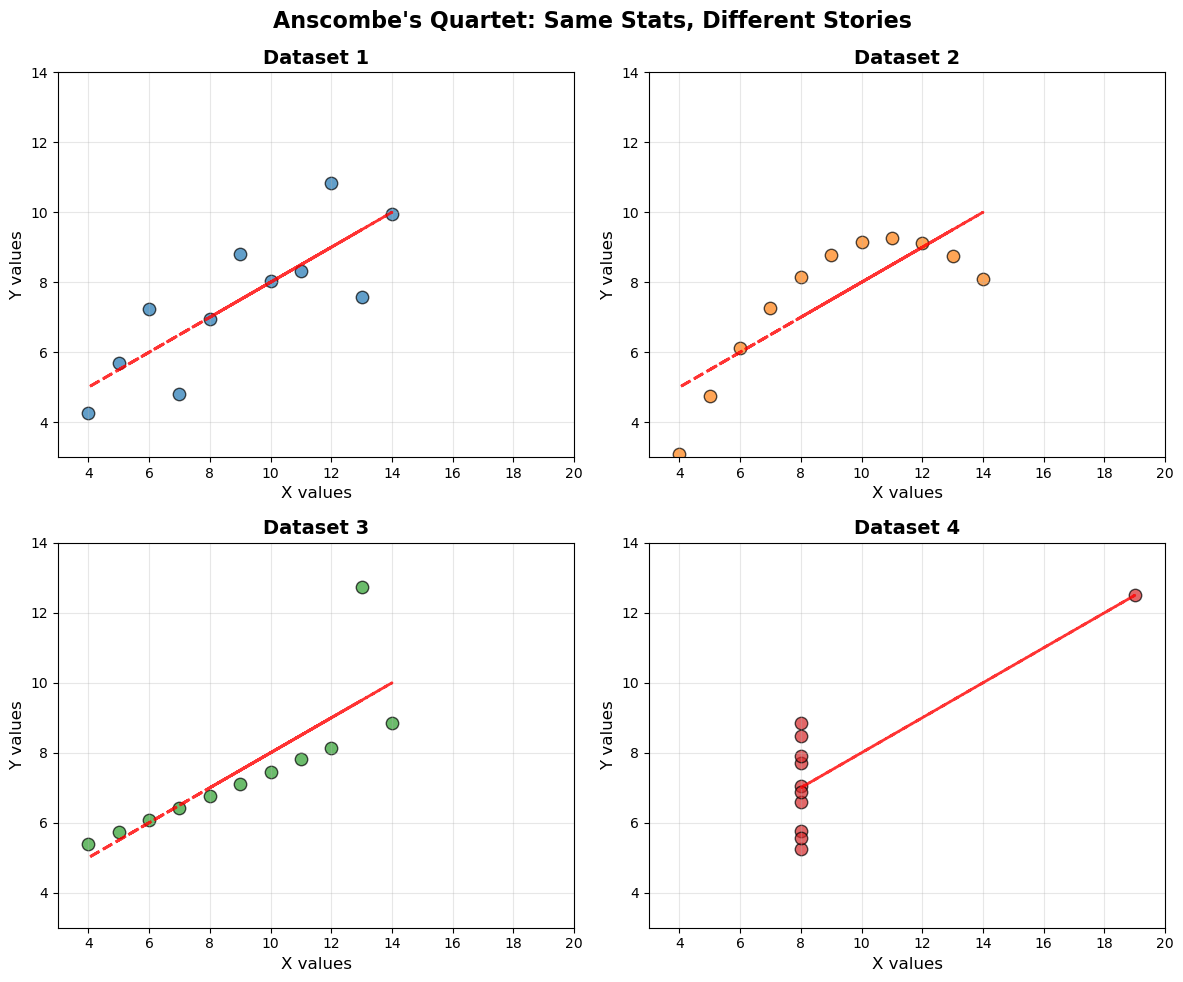

🎯 KEY INSIGHT: Statistics alone can be misleading!
   Dataset 1: Linear relationship
   Dataset 2: Non-linear (quadratic) relationship
   Dataset 3: Perfect linear with one outlier
   Dataset 4: No relationship except for one outlier

   This is why we ALWAYS visualize our data! 📊


In [3]:
# Visualize Anscombe's Quartet
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Anscombe's Quartet: Same Stats, Different Stories", fontsize=16, fontweight='bold')

axes = axes.flatten()
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Distinct colors

for i, (name, data) in enumerate(anscombe.items()):
    x, y = data['x'], data['y']
    
    # Scatter plot
    axes[i].scatter(x, y, color=colors[i], s=80, alpha=0.7, edgecolors='black', linewidth=1)
    
    # Add trend line
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    axes[i].plot(x, p(x), color='red', linestyle='--', linewidth=2, alpha=0.8)
    
    # Formatting
    axes[i].set_title(f'Dataset {i+1}', fontweight='bold')
    axes[i].set_xlabel('X values')
    axes[i].set_ylabel('Y values')
    axes[i].grid(True, alpha=0.3)
    axes[i].set_xlim(3, 20)
    axes[i].set_ylim(3, 14)

plt.tight_layout()
plt.show()

print("🎯 KEY INSIGHT: Statistics alone can be misleading!")
print("   Dataset 1: Linear relationship")
print("   Dataset 2: Non-linear (quadratic) relationship")
print("   Dataset 3: Perfect linear with one outlier")
print("   Dataset 4: No relationship except for one outlier")
print("\n   This is why we ALWAYS visualize our data! 📊")

## 📐 The Grammar of Graphics {#grammar}

The **Grammar of Graphics** is a theoretical framework for understanding how visualizations work. Think of it as the "sentence structure" for data visualization.

### Core Components

1. **📊 Data**: The information you want to visualize
2. **🗺️ Aesthetics (aes)**: How data maps to visual properties
3. **🔷 Geometries (geom)**: The type of plot (points, lines, bars)
4. **🎨 Scales**: How aesthetic mappings are rendered
5. **📋 Facets**: Breaking data into subplots
6. **🎯 Coordinates**: The coordinate system
7. **🎨 Themes**: Overall visual styling

Let's build a visualization step by step to understand this:

In [4]:
# Create sample data for demonstration
np.random.seed(42)
n_samples = 100

sample_data = pd.DataFrame({
    'height': np.random.normal(170, 10, n_samples),  # cm
    'weight': np.random.normal(70, 15, n_samples),   # kg
    'age': np.random.randint(18, 65, n_samples),     # years
    'gender': np.random.choice(['Male', 'Female'], n_samples),
    'exercise_hours': np.random.exponential(2, n_samples)  # hours per week
})

# Add some realistic relationships
sample_data.loc[sample_data['gender'] == 'Male', 'height'] += 8
sample_data.loc[sample_data['gender'] == 'Male', 'weight'] += 10
sample_data['bmi'] = sample_data['weight'] / (sample_data['height'] / 100) ** 2

print("📊 Sample Dataset Created:")
print(sample_data.head())
print(f"\n📏 Dataset shape: {sample_data.shape}")
print(f"📋 Columns: {list(sample_data.columns)}")

📊 Sample Dataset Created:
       height     weight  age  gender  exercise_hours        bmi
0  174.967142  48.769439   19  Female        1.715688  15.930697
1  168.617357  63.690320   43  Female        2.630910  22.401076
2  184.476885  74.859282   34    Male        0.273220  21.996913
3  193.230299  67.965841   57    Male        0.575408  18.202886
4  167.658466  67.580714   50  Female        1.737593  24.042067

📏 Dataset shape: (100, 6)
📋 Columns: ['height', 'weight', 'age', 'gender', 'exercise_hours', 'bmi']


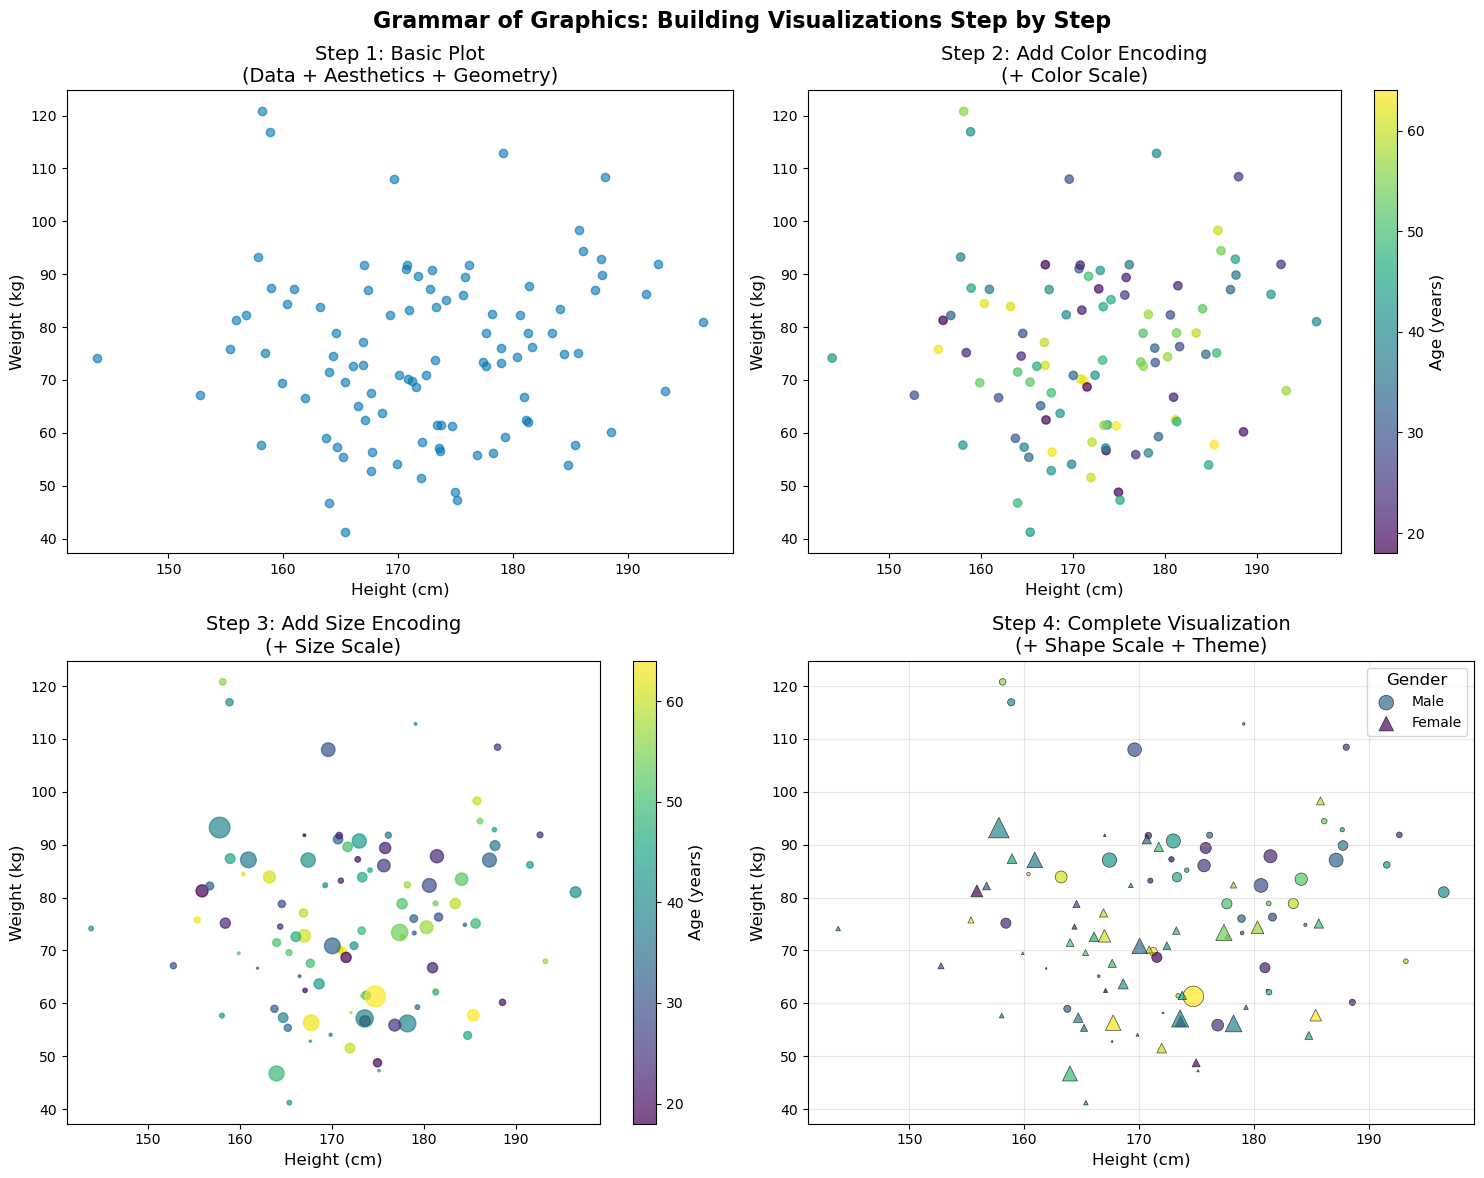

🎯 Grammar of Graphics Components Demonstrated:
   📊 Data: Height, Weight, Age, Gender, Exercise Hours
   📍 Position: X = Height, Y = Weight
   🎨 Color: Age (continuous scale)
   📏 Size: Exercise Hours
   🔷 Shape: Gender (Male = circle, Female = triangle)
   🎨 Theme: Grid, legend, colors, transparency


In [5]:
# Grammar of Graphics in Action: Building a visualization step by step

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Grammar of Graphics: Building Visualizations Step by Step', fontsize=16, fontweight='bold')

# Step 1: Basic scatter plot (Data + Aesthetics + Geometry)
axes[0, 0].scatter(sample_data['height'], sample_data['weight'], alpha=0.6)
axes[0, 0].set_title('Step 1: Basic Plot\n(Data + Aesthetics + Geometry)')
axes[0, 0].set_xlabel('Height (cm)')
axes[0, 0].set_ylabel('Weight (kg)')

# Step 2: Add color encoding (+ Color Scale)
scatter2 = axes[0, 1].scatter(sample_data['height'], sample_data['weight'], 
                             c=sample_data['age'], alpha=0.7, cmap='viridis')
axes[0, 1].set_title('Step 2: Add Color Encoding\n(+ Color Scale)')
axes[0, 1].set_xlabel('Height (cm)')
axes[0, 1].set_ylabel('Weight (kg)')
plt.colorbar(scatter2, ax=axes[0, 1], label='Age (years)')

# Step 3: Add size encoding (+ Size Scale)
scatter3 = axes[1, 0].scatter(sample_data['height'], sample_data['weight'], 
                             c=sample_data['age'], s=sample_data['exercise_hours']*20,
                             alpha=0.7, cmap='viridis')
axes[1, 0].set_title('Step 3: Add Size Encoding\n(+ Size Scale)')
axes[1, 0].set_xlabel('Height (cm)')
axes[1, 0].set_ylabel('Weight (kg)')
plt.colorbar(scatter3, ax=axes[1, 0], label='Age (years)')

# Step 4: Add shape encoding and better theme (+ Shape Scale + Theme)
for gender in ['Male', 'Female']:
    subset = sample_data[sample_data['gender'] == gender]
    marker = 'o' if gender == 'Male' else '^'
    axes[1, 1].scatter(subset['height'], subset['weight'], 
                      c=subset['age'], s=subset['exercise_hours']*20,
                      alpha=0.7, cmap='viridis', marker=marker, label=gender,
                      edgecolors='black', linewidth=0.5)

axes[1, 1].set_title('Step 4: Complete Visualization\n(+ Shape Scale + Theme)')
axes[1, 1].set_xlabel('Height (cm)')
axes[1, 1].set_ylabel('Weight (kg)')
axes[1, 1].legend(title='Gender')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("🎯 Grammar of Graphics Components Demonstrated:")
print("   📊 Data: Height, Weight, Age, Gender, Exercise Hours")
print("   📍 Position: X = Height, Y = Weight")
print("   🎨 Color: Age (continuous scale)")
print("   📏 Size: Exercise Hours")
print("   🔷 Shape: Gender (Male = circle, Female = triangle)")
print("   🎨 Theme: Grid, legend, colors, transparency")

## 🎯 Chart Selection Framework {#framework}

Choosing the right chart type is crucial for effective communication. Here's a decision framework:

### 🤔 Ask These Questions:

1. **What type of data do I have?**
   - Categorical vs. Numerical
   - Time series vs. Cross-sectional
   - Single variable vs. Multiple variables

2. **What story am I trying to tell?**
   - Compare values
   - Show distribution
   - Reveal relationships
   - Track changes over time
   - Show part-to-whole

3. **Who is my audience?**
   - Technical expertise level
   - Time available
   - Decision-making context

Let's explore the most common chart types:

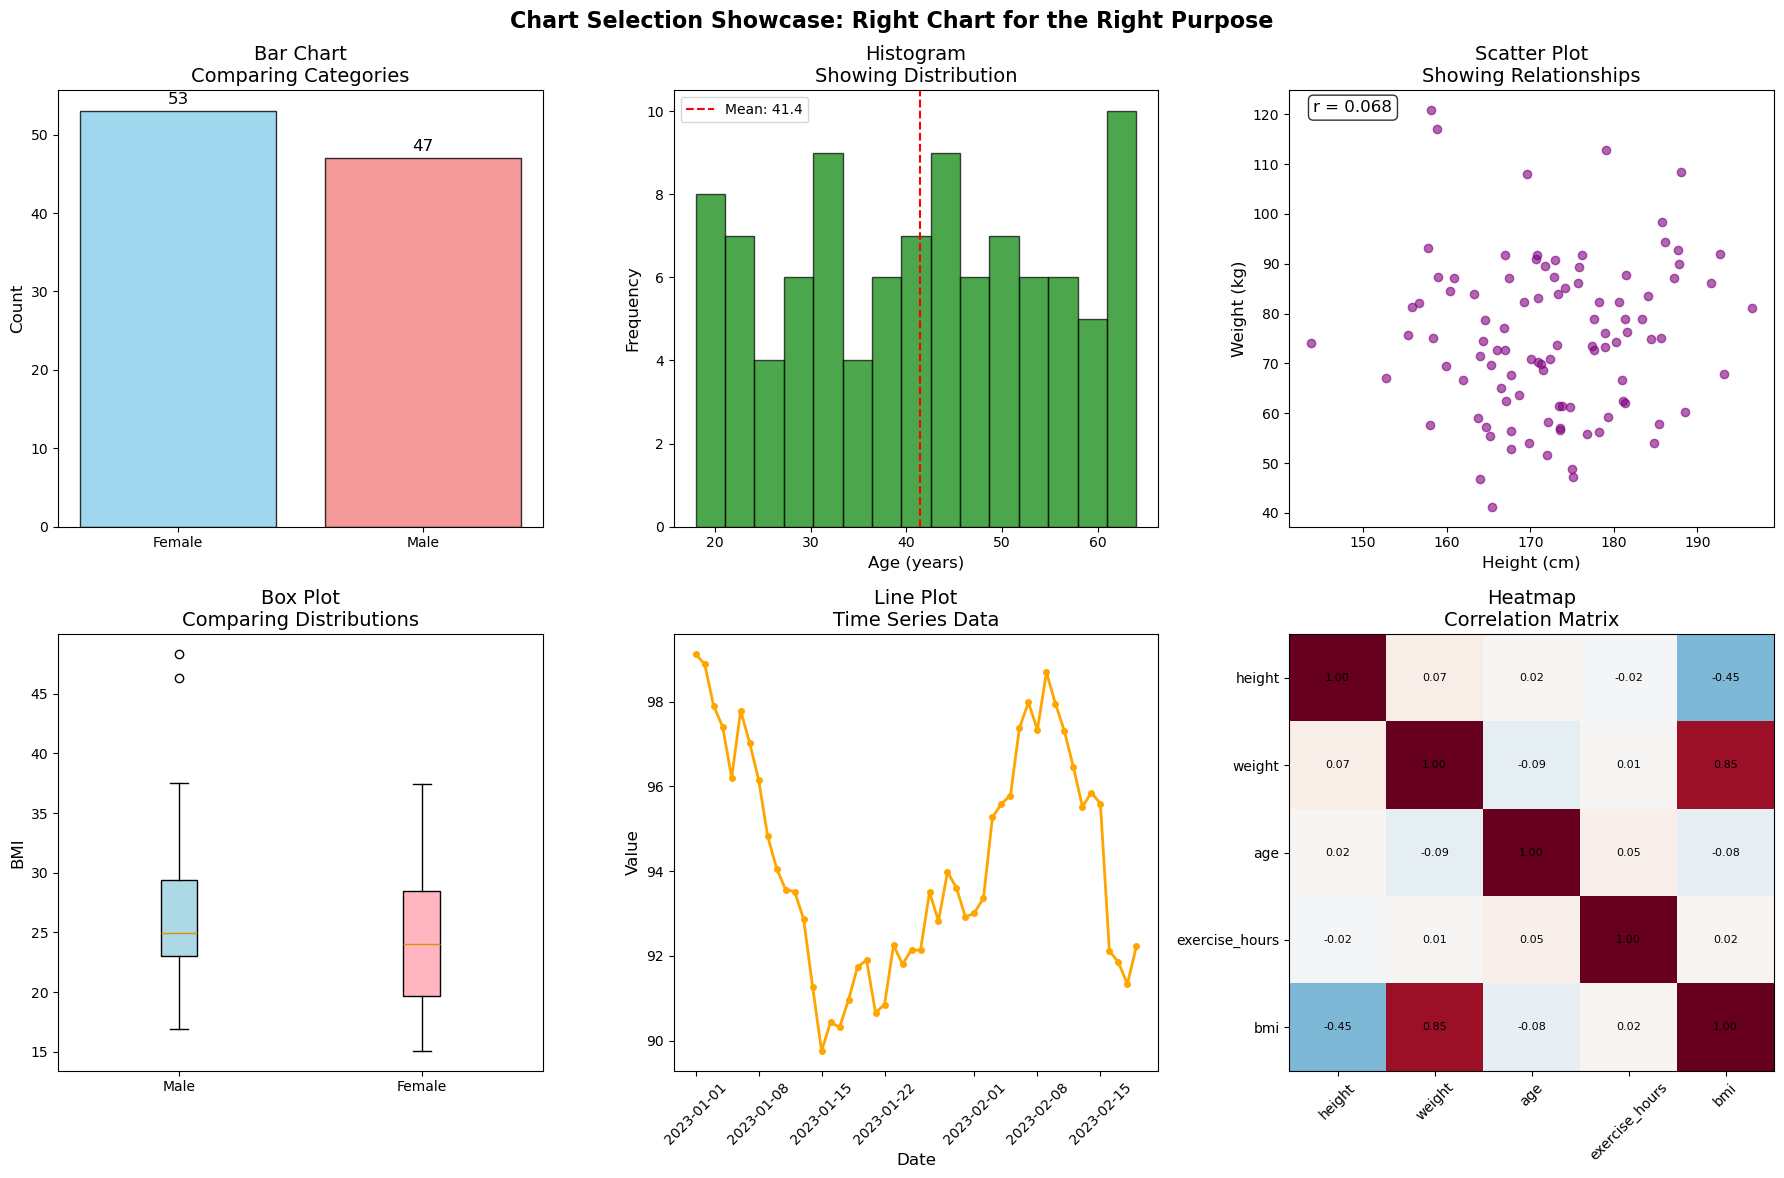

📊 Chart Type Guide:
   📊 Bar Chart: Compare categorical values
   📈 Histogram: Show distribution of continuous data
   🔵 Scatter Plot: Explore relationships between variables
   📦 Box Plot: Compare distributions across groups
   📈 Line Plot: Track changes over time
   🔥 Heatmap: Show patterns in matrix data


In [6]:
# Chart Type Showcase: Different charts for different purposes
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Chart Selection Showcase: Right Chart for the Right Purpose', fontsize=16, fontweight='bold')

# 1. Bar Chart - Comparing Categories
category_counts = sample_data['gender'].value_counts()
bars = axes[0, 0].bar(category_counts.index, category_counts.values, 
                     color=['skyblue', 'lightcoral'], alpha=0.8, edgecolor='black')
axes[0, 0].set_title('Bar Chart\nComparing Categories')
axes[0, 0].set_ylabel('Count')
# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    axes[0, 0].text(bar.get_x() + bar.get_width()/2., height + 0.5,
                   f'{int(height)}', ha='center', va='bottom')

# 2. Histogram - Showing Distribution
axes[0, 1].hist(sample_data['age'], bins=15, alpha=0.7, color='green', edgecolor='black')
axes[0, 1].set_title('Histogram\nShowing Distribution')
axes[0, 1].set_xlabel('Age (years)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].axvline(sample_data['age'].mean(), color='red', linestyle='--', 
                  label=f'Mean: {sample_data["age"].mean():.1f}')
axes[0, 1].legend()

# 3. Scatter Plot - Showing Relationships
axes[0, 2].scatter(sample_data['height'], sample_data['weight'], alpha=0.6, color='purple')
axes[0, 2].set_title('Scatter Plot\nShowing Relationships')
axes[0, 2].set_xlabel('Height (cm)')
axes[0, 2].set_ylabel('Weight (kg)')
# Add correlation coefficient
corr = sample_data['height'].corr(sample_data['weight'])
axes[0, 2].text(0.05, 0.95, f'r = {corr:.3f}', transform=axes[0, 2].transAxes, 
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# 4. Box Plot - Comparing Distributions
gender_groups = [sample_data[sample_data['gender'] == g]['bmi'] for g in ['Male', 'Female']]
box_plot = axes[1, 0].boxplot(gender_groups, labels=['Male', 'Female'], patch_artist=True)
colors = ['lightblue', 'lightpink']
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)
axes[1, 0].set_title('Box Plot\nComparing Distributions')
axes[1, 0].set_ylabel('BMI')

# 5. Line Plot - Time Series (simulated)
time_data = pd.date_range('2023-01-01', periods=50, freq='D')
values = np.cumsum(np.random.randn(50)) + 100
axes[1, 1].plot(time_data, values, marker='o', linewidth=2, markersize=4, color='orange')
axes[1, 1].set_title('Line Plot\nTime Series Data')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Value')
axes[1, 1].tick_params(axis='x', rotation=45)

# 6. Heatmap - Correlation Matrix
numeric_cols = ['height', 'weight', 'age', 'exercise_hours', 'bmi']
corr_matrix = sample_data[numeric_cols].corr()
im = axes[1, 2].imshow(corr_matrix, cmap='RdBu_r', aspect='auto', vmin=-1, vmax=1)
axes[1, 2].set_title('Heatmap\nCorrelation Matrix')
axes[1, 2].set_xticks(range(len(numeric_cols)))
axes[1, 2].set_yticks(range(len(numeric_cols)))
axes[1, 2].set_xticklabels(numeric_cols, rotation=45)
axes[1, 2].set_yticklabels(numeric_cols)

# Add correlation values to heatmap
for i in range(len(numeric_cols)):
    for j in range(len(numeric_cols)):
        text = axes[1, 2].text(j, i, f'{corr_matrix.iloc[i, j]:.2f}',
                              ha="center", va="center", color="black", fontsize=8)

plt.tight_layout()
plt.show()

print("📊 Chart Type Guide:")
print("   📊 Bar Chart: Compare categorical values")
print("   📈 Histogram: Show distribution of continuous data")
print("   🔵 Scatter Plot: Explore relationships between variables")
print("   📦 Box Plot: Compare distributions across groups")
print("   📈 Line Plot: Track changes over time")
print("   🔥 Heatmap: Show patterns in matrix data")

## 🎨 Your First Visualizations {#first-viz}

Now let's create some visualizations step by step, focusing on best practices:

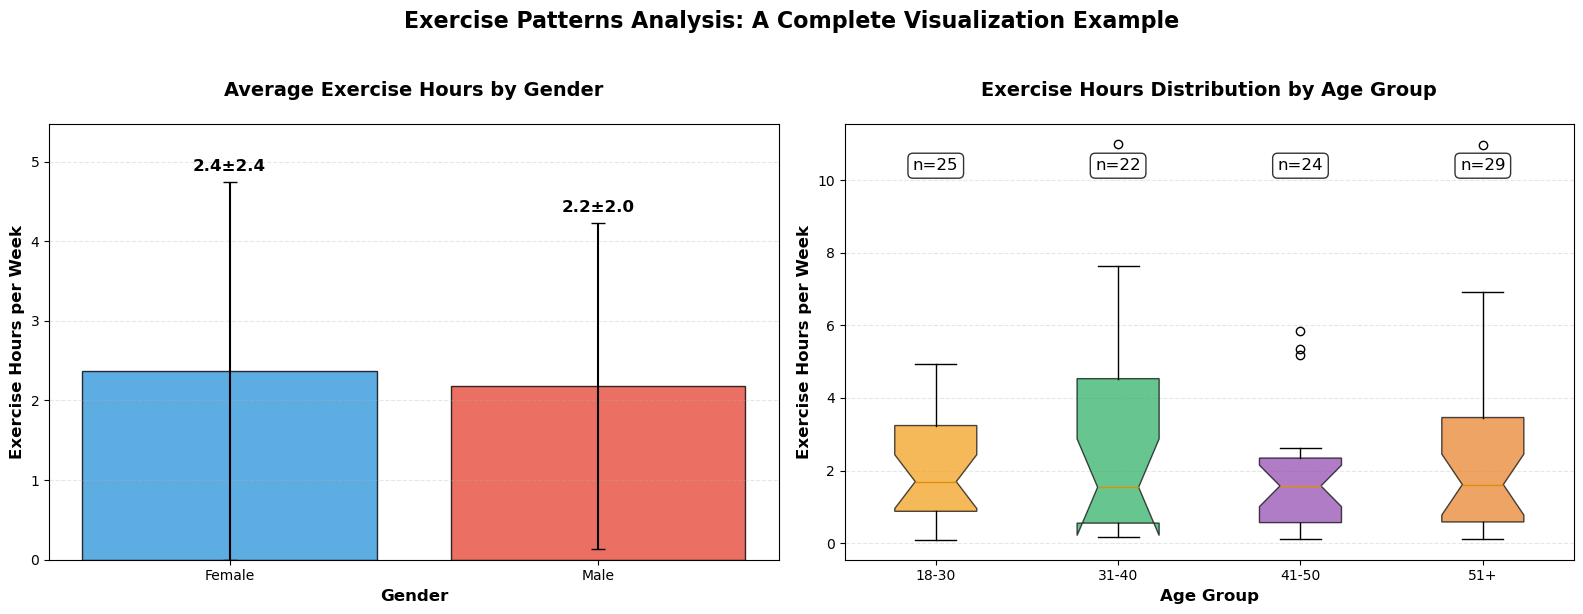

✨ Professional Visualization Elements Added:
   📊 Clear, descriptive titles
   🏷️ Proper axis labels with units
   📐 Error bars for uncertainty
   🔢 Data labels for exact values
   🎨 Consistent color scheme
   📏 Sample size information
   🔲 Grid lines for easier reading
   🎯 Appropriate chart types for data


In [7]:
# Create a professional-looking visualization from scratch
# Topic: Exercise patterns by gender and age

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Exercise Patterns Analysis: A Complete Visualization Example', 
             fontsize=16, fontweight='bold', y=1.02)

# Left plot: Exercise by Gender (with better design)
exercise_by_gender = sample_data.groupby('gender')['exercise_hours'].agg(['mean', 'std']).reset_index()

# Create bars with error bars
x_pos = np.arange(len(exercise_by_gender))
bars = ax1.bar(x_pos, exercise_by_gender['mean'], 
               yerr=exercise_by_gender['std'],
               capsize=5, 
               color=['#3498db', '#e74c3c'], 
               alpha=0.8,
               edgecolor='black',
               linewidth=1)

# Customize the plot
ax1.set_title('Average Exercise Hours by Gender', fontweight='bold', pad=20)
ax1.set_xlabel('Gender', fontweight='bold')
ax1.set_ylabel('Exercise Hours per Week', fontweight='bold')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(exercise_by_gender['gender'])
ax1.grid(axis='y', alpha=0.3, linestyle='--')
ax1.set_ylim(0, ax1.get_ylim()[1] * 1.1)

# Add value labels on top of bars
for i, (bar, mean_val, std_val) in enumerate(zip(bars, exercise_by_gender['mean'], exercise_by_gender['std'])):
    height = bar.get_height() + std_val
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.1,
            f'{mean_val:.1f}±{std_val:.1f}',
            ha='center', va='bottom', fontweight='bold')

# Right plot: Exercise vs Age (with trend line)
# Create age groups for better visualization
sample_data['age_group'] = pd.cut(sample_data['age'], 
                                  bins=[0, 30, 40, 50, 100], 
                                  labels=['18-30', '31-40', '41-50', '51+'])

# Box plot with custom colors
box_data = [sample_data[sample_data['age_group'] == group]['exercise_hours'].dropna() 
            for group in ['18-30', '31-40', '41-50', '51+']]

bp = ax2.boxplot(box_data, labels=['18-30', '31-40', '41-50', '51+'], 
                patch_artist=True, notch=True)

# Color the boxes
colors = ['#f39c12', '#27ae60', '#8e44ad', '#e67e22']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax2.set_title('Exercise Hours Distribution by Age Group', fontweight='bold', pad=20)
ax2.set_xlabel('Age Group', fontweight='bold')
ax2.set_ylabel('Exercise Hours per Week', fontweight='bold')
ax2.grid(axis='y', alpha=0.3, linestyle='--')

# Add sample size annotations
for i, group in enumerate(['18-30', '31-40', '41-50', '51+']):
    n = len(sample_data[sample_data['age_group'] == group])
    ax2.text(i+1, ax2.get_ylim()[1] * 0.9, f'n={n}', 
            ha='center', va='center', 
            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

print("✨ Professional Visualization Elements Added:")
print("   📊 Clear, descriptive titles")
print("   🏷️ Proper axis labels with units")
print("   📐 Error bars for uncertainty")
print("   🔢 Data labels for exact values")
print("   🎨 Consistent color scheme")
print("   📏 Sample size information")
print("   🔲 Grid lines for easier reading")
print("   🎯 Appropriate chart types for data")

## ❌ Common Mistakes and How to Avoid Them {#mistakes}

Let's look at common visualization mistakes and how to fix them:

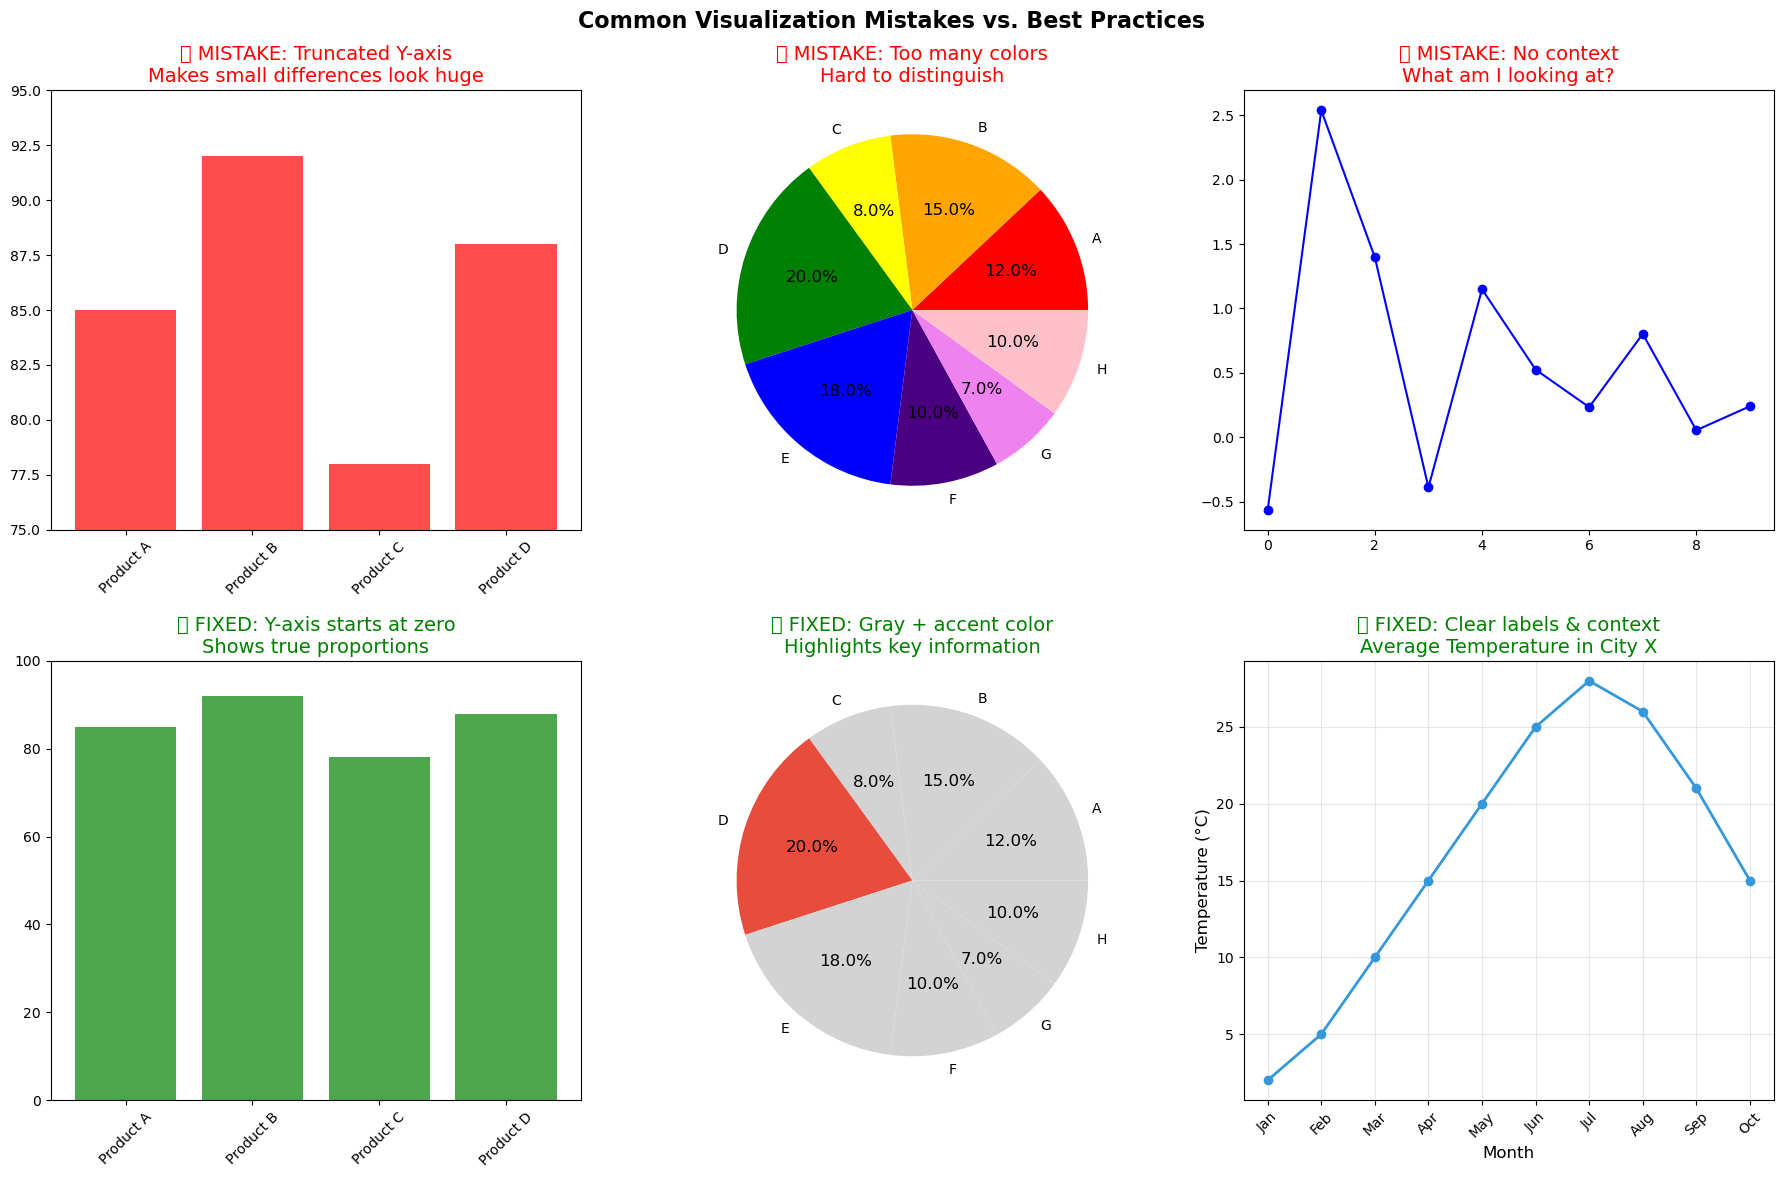

🚫 TOP MISTAKES TO AVOID:
   1. Truncating axes to exaggerate differences
   2. Using too many colors or rainbow palettes
   3. Missing labels, units, or context
   4. 3D effects when 2D would be clearer
   5. Pie charts with too many slices
   6. Dual y-axes that mislead

✅ BEST PRACTICES:
   ✓ Start bar charts at zero
   ✓ Use color purposefully (≤5 colors)
   ✓ Always label axes with units
   ✓ Provide clear, descriptive titles
   ✓ Include sample sizes when relevant
   ✓ Test with colorblind viewers


In [8]:
# Common Mistakes Demonstration
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Common Visualization Mistakes vs. Best Practices', fontsize=16, fontweight='bold')

# Sample data for examples
categories = ['Product A', 'Product B', 'Product C', 'Product D']
values = [85, 92, 78, 88]
small_values = [2.1, 2.3, 1.9, 2.2]

# Mistake 1: Truncated Y-axis (BAD)
axes[0, 0].bar(categories, values, color='red', alpha=0.7)
axes[0, 0].set_ylim(75, 95)  # Truncated axis makes differences look huge
axes[0, 0].set_title('❌ MISTAKE: Truncated Y-axis\nMakes small differences look huge', color='red')
axes[0, 0].tick_params(axis='x', rotation=45)

# Fix 1: Start from zero (GOOD)
axes[1, 0].bar(categories, values, color='green', alpha=0.7)
axes[1, 0].set_ylim(0, 100)  # Start from zero for honest comparison
axes[1, 0].set_title('✅ FIXED: Y-axis starts at zero\nShows true proportions', color='green')
axes[1, 0].tick_params(axis='x', rotation=45)

# Mistake 2: Too many colors (BAD)
rainbow_colors = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet', 'pink']
pie_data = [12, 15, 8, 20, 18, 10, 7, 10]
pie_labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
axes[0, 1].pie(pie_data, labels=pie_labels, colors=rainbow_colors[:len(pie_data)], autopct='%1.1f%%')
axes[0, 1].set_title('❌ MISTAKE: Too many colors\nHard to distinguish', color='red')

# Fix 2: Grayscale + accent (GOOD)
gray_colors = ['lightgray'] * len(pie_data)
gray_colors[3] = '#e74c3c'  # Highlight the important one
axes[1, 1].pie(pie_data, labels=pie_labels, colors=gray_colors, autopct='%1.1f%%')
axes[1, 1].set_title('✅ FIXED: Gray + accent color\nHighlights key information', color='green')

# Mistake 3: No context/poor labeling (BAD)
x = np.arange(10)
y = np.random.randn(10)
axes[0, 2].plot(x, y, 'b-o')
axes[0, 2].set_title('❌ MISTAKE: No context\nWhat am I looking at?', color='red')
# No axis labels, no units, no context

# Fix 3: Clear labels and context (GOOD)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct']
temperature = [2, 5, 10, 15, 20, 25, 28, 26, 21, 15]
axes[1, 2].plot(months, temperature, 'o-', color='#3498db', linewidth=2, markersize=6)
axes[1, 2].set_title('✅ FIXED: Clear labels & context\nAverage Temperature in City X', color='green')
axes[1, 2].set_xlabel('Month')
axes[1, 2].set_ylabel('Temperature (°C)')
axes[1, 2].tick_params(axis='x', rotation=45)
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("🚫 TOP MISTAKES TO AVOID:")
print("   1. Truncating axes to exaggerate differences")
print("   2. Using too many colors or rainbow palettes")
print("   3. Missing labels, units, or context")
print("   4. 3D effects when 2D would be clearer")
print("   5. Pie charts with too many slices")
print("   6. Dual y-axes that mislead")
print("\n✅ BEST PRACTICES:")
print("   ✓ Start bar charts at zero")
print("   ✓ Use color purposefully (≤5 colors)")
print("   ✓ Always label axes with units")
print("   ✓ Provide clear, descriptive titles")
print("   ✓ Include sample sizes when relevant")
print("   ✓ Test with colorblind viewers")

## 💪 Practical Exercises {#exercises}

Time to practice! Complete these exercises to reinforce your learning:

In [9]:
# Exercise Dataset: Sales data
np.random.seed(123)
sales_data = pd.DataFrame({
    'month': pd.date_range('2023-01-01', periods=12, freq='M'),
    'product_a': np.random.normal(1000, 200, 12).astype(int),
    'product_b': np.random.normal(800, 150, 12).astype(int),
    'product_c': np.random.normal(600, 100, 12).astype(int),
    'region': np.random.choice(['North', 'South', 'East', 'West'], 12),
    'temperature': [2, 5, 10, 15, 20, 25, 28, 26, 21, 15, 8, 3],  # Seasonal
})

# Add some correlation between temperature and sales
sales_data['ice_cream'] = (sales_data['temperature'] * 10 + 
                          np.random.normal(0, 50, 12)).astype(int)

print("📊 EXERCISE DATASET: Monthly Sales Data")
print(sales_data.head())
print(f"\nDataset shape: {sales_data.shape}")

print("\n🎯 EXERCISES TO COMPLETE:")
print("\n1. **Line Chart Challenge**:")
print("   Create a line chart showing all three products' sales over time")
print("   Requirements: Different colors, legend, proper labels")

print("\n2. **Correlation Analysis**:")
print("   Create a scatter plot of temperature vs ice_cream sales")
print("   Requirements: Add trend line, correlation coefficient")

print("\n3. **Comparison Chart**:")
print("   Create a bar chart comparing average sales by region")
print("   Requirements: Error bars, sorted by value, proper colors")

print("\n4. **Distribution Analysis**:")
print("   Create histograms for all three products")
print("   Requirements: Subplots, consistent bins, appropriate titles")

print("\n📝 Try these exercises on your own, then check the solutions below!")

📊 EXERCISE DATASET: Monthly Sales Data
       month  product_a  product_b  product_c region  temperature  ice_cream
0 2023-01-31        782       1023        474   East            2          0
1 2023-02-28       1199        704        536  North            5         78
2 2023-03-31       1056        733        690   East           10        116
3 2023-04-30        698        734        457  South           15        149
4 2023-05-31        884       1130        585   West           20        319

Dataset shape: (12, 7)

🎯 EXERCISES TO COMPLETE:

1. **Line Chart Challenge**:
   Create a line chart showing all three products' sales over time
   Requirements: Different colors, legend, proper labels

2. **Correlation Analysis**:
   Create a scatter plot of temperature vs ice_cream sales
   Requirements: Add trend line, correlation coefficient

3. **Comparison Chart**:
   Create a bar chart comparing average sales by region
   Requirements: Error bars, sorted by value, proper colors

4. **D

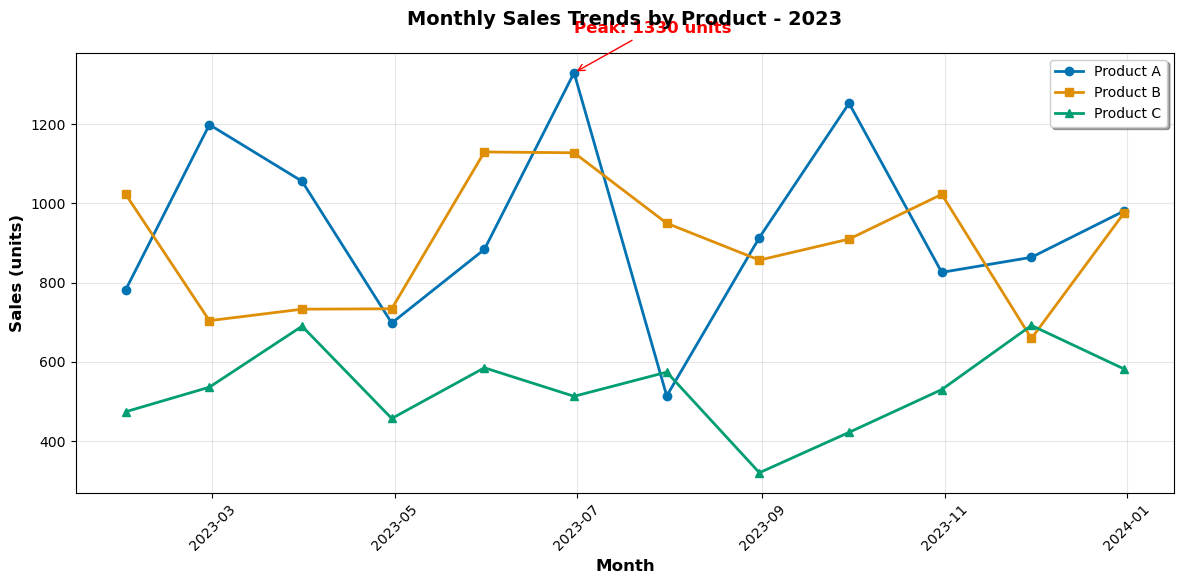

✅ Solution 1 Complete: Multi-line chart with annotations


In [10]:
# SOLUTION 1: Line Chart Challenge
plt.figure(figsize=(12, 6))

# Plot each product
plt.plot(sales_data['month'], sales_data['product_a'], 'o-', label='Product A', linewidth=2)
plt.plot(sales_data['month'], sales_data['product_b'], 's-', label='Product B', linewidth=2)
plt.plot(sales_data['month'], sales_data['product_c'], '^-', label='Product C', linewidth=2)

# Formatting
plt.title('Monthly Sales Trends by Product - 2023', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Month', fontweight='bold')
plt.ylabel('Sales (units)', fontweight='bold')
plt.legend(loc='upper right', frameon=True, fancybox=True, shadow=True)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Add annotations for insights
max_a = sales_data['product_a'].max()
max_month = sales_data.loc[sales_data['product_a'].idxmax(), 'month']
plt.annotate(f'Peak: {max_a} units', 
            xy=(max_month, max_a), 
            xytext=(max_month, max_a + 100),
            arrowprops=dict(arrowstyle='->', color='red'),
            fontweight='bold', color='red')

plt.tight_layout()
plt.show()

print("✅ Solution 1 Complete: Multi-line chart with annotations")

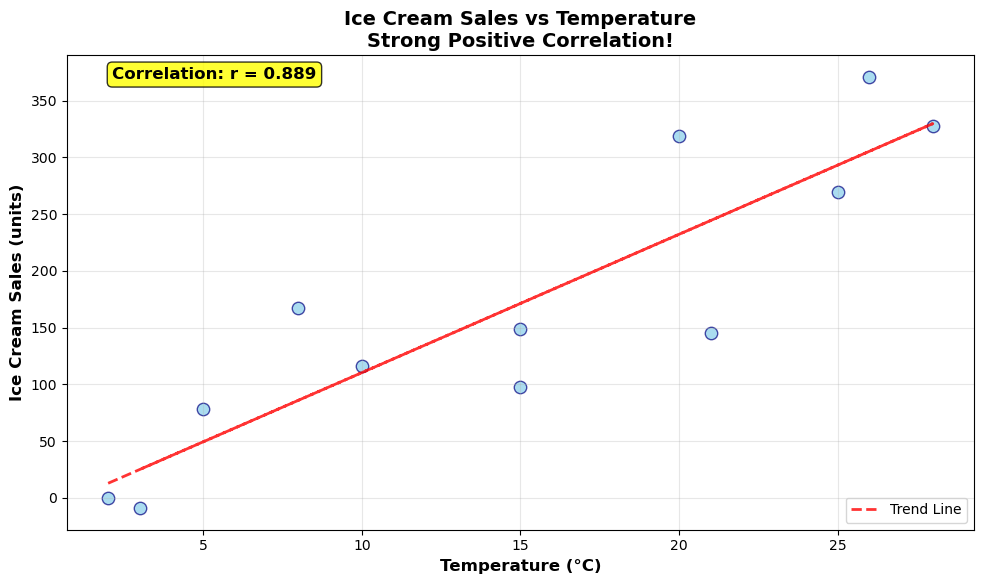

✅ Solution 2 Complete: Correlation = 0.889 (Strong positive!)


In [11]:
# SOLUTION 2: Correlation Analysis
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(sales_data['temperature'], sales_data['ice_cream'], 
           s=80, alpha=0.7, color='skyblue', edgecolors='navy')

# Add trend line
z = np.polyfit(sales_data['temperature'], sales_data['ice_cream'], 1)
p = np.poly1d(z)
plt.plot(sales_data['temperature'], p(sales_data['temperature']), 
         "r--", alpha=0.8, linewidth=2, label='Trend Line')

# Calculate and display correlation
correlation = sales_data['temperature'].corr(sales_data['ice_cream'])
plt.text(0.05, 0.95, f'Correlation: r = {correlation:.3f}', 
         transform=plt.gca().transAxes,
         bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.8),
         fontsize=12, fontweight='bold')

# Formatting
plt.title('Ice Cream Sales vs Temperature\nStrong Positive Correlation!', 
          fontsize=14, fontweight='bold')
plt.xlabel('Temperature (°C)', fontweight='bold')
plt.ylabel('Ice Cream Sales (units)', fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

print(f"✅ Solution 2 Complete: Correlation = {correlation:.3f} (Strong positive!)")

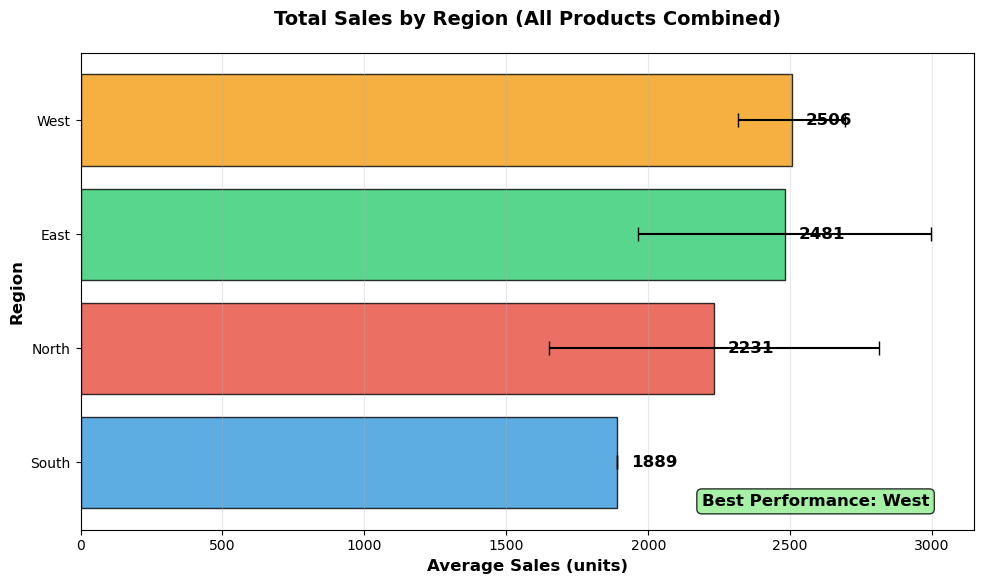

✅ Solution 3 Complete: Regional comparison with insights


In [12]:
# SOLUTION 3: Comparison Chart
plt.figure(figsize=(10, 6))

# Calculate regional averages
regional_avg = sales_data.groupby('region')[['product_a', 'product_b', 'product_c']].mean().sum(axis=1)
regional_std = sales_data.groupby('region')[['product_a', 'product_b', 'product_c']].std().sum(axis=1)

# Sort by value for better visualization
regional_data = pd.DataFrame({'avg': regional_avg, 'std': regional_std}).sort_values('avg', ascending=True)

# Create horizontal bar chart (better for region names)
bars = plt.barh(regional_data.index, regional_data['avg'], 
                xerr=regional_data['std'], capsize=5,
                color=['#3498db', '#e74c3c', '#2ecc71', '#f39c12'],
                alpha=0.8, edgecolor='black')

# Add value labels
for i, (bar, val) in enumerate(zip(bars, regional_data['avg'])):
    plt.text(val + 50, bar.get_y() + bar.get_height()/2, 
             f'{val:.0f}', ha='left', va='center', fontweight='bold')

plt.title('Total Sales by Region (All Products Combined)', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Average Sales (units)', fontweight='bold')
plt.ylabel('Region', fontweight='bold')
plt.grid(axis='x', alpha=0.3)

# Add insight annotation
best_region = regional_data.index[-1]
plt.text(0.95, 0.05, f'Best Performance: {best_region}', 
         transform=plt.gca().transAxes, ha='right',
         bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8),
         fontweight='bold')

plt.tight_layout()
plt.show()

print("✅ Solution 3 Complete: Regional comparison with insights")

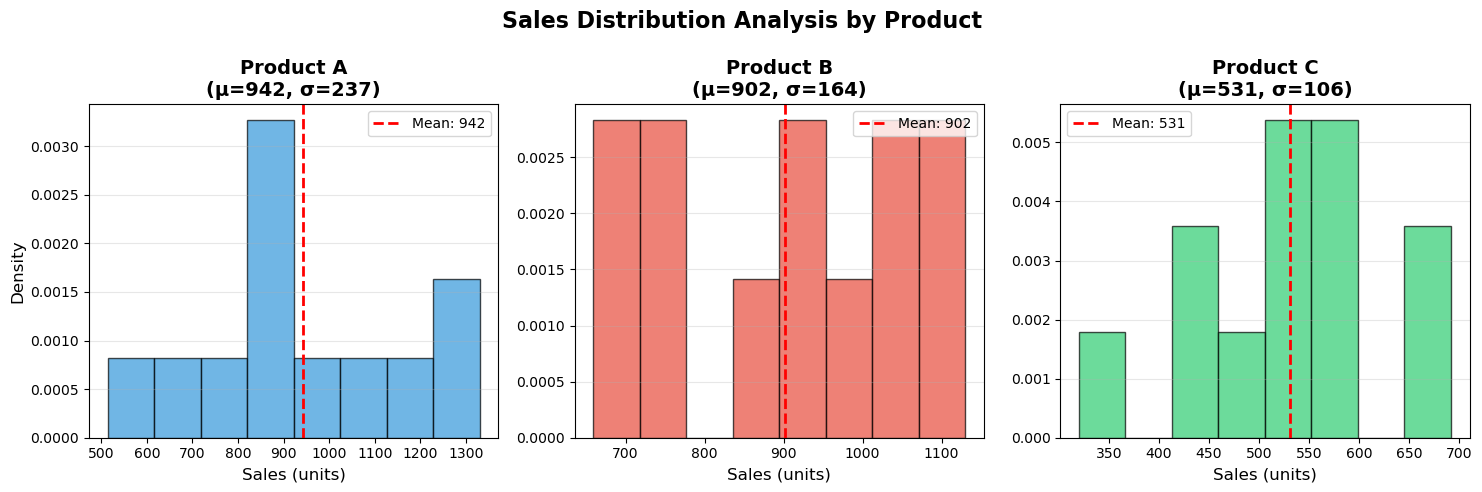

✅ Solution 4 Complete: Distribution analysis with statistics

🎉 ALL EXERCISES COMPLETED!
   You've successfully created:
   ✓ Multi-series line chart with annotations
   ✓ Correlation analysis with trend line
   ✓ Comparative bar chart with error bars
   ✓ Distribution analysis with statistical summaries


In [13]:
# SOLUTION 4: Distribution Analysis
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Sales Distribution Analysis by Product', fontsize=16, fontweight='bold')

products = ['product_a', 'product_b', 'product_c']
colors = ['#3498db', '#e74c3c', '#2ecc71']
product_names = ['Product A', 'Product B', 'Product C']

for i, (product, color, name) in enumerate(zip(products, colors, product_names)):
    # Histogram
    axes[i].hist(sales_data[product], bins=8, alpha=0.7, color=color, 
                edgecolor='black', density=True)
    
    # Add mean line
    mean_val = sales_data[product].mean()
    axes[i].axvline(mean_val, color='red', linestyle='--', linewidth=2,
                   label=f'Mean: {mean_val:.0f}')
    
    # Formatting
    axes[i].set_title(f'{name}\n(μ={mean_val:.0f}, σ={sales_data[product].std():.0f})', 
                     fontweight='bold')
    axes[i].set_xlabel('Sales (units)')
    axes[i].set_ylabel('Density' if i == 0 else '')
    axes[i].legend()
    axes[i].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Solution 4 Complete: Distribution analysis with statistics")
print("\n🎉 ALL EXERCISES COMPLETED!")
print("   You've successfully created:")
print("   ✓ Multi-series line chart with annotations")
print("   ✓ Correlation analysis with trend line")
print("   ✓ Comparative bar chart with error bars")
print("   ✓ Distribution analysis with statistical summaries")

## 🎯 Key Takeaways {#takeaways}

Congratulations! You've completed Module 1 of the comprehensive data visualization series. Here are the key concepts you've mastered:

### 🧠 Fundamental Principles
1. **Visualization Purpose**: Data visualization helps us process information faster and discover patterns
2. **Grammar of Graphics**: Understanding the building blocks (data, aesthetics, geometries, scales)
3. **Chart Selection**: Choose charts based on data type and story you want to tell
4. **Best Practices**: Clear labels, appropriate scales, purposeful colors, accessibility

### 🛠️ Technical Skills
- Setting up matplotlib and seaborn environments
- Creating basic chart types (bar, scatter, line, histogram, box, heatmap)
- Adding professional touches (error bars, annotations, proper formatting)
- Avoiding common visualization mistakes

### 📊 Chart Types Mastered
- **Bar Charts**: Comparing categories
- **Histograms**: Showing distributions
- **Scatter Plots**: Exploring relationships
- **Line Charts**: Time series data
- **Box Plots**: Comparing distributions
- **Heatmaps**: Matrix visualizations

### 🎨 Design Principles
- Start bar charts at zero
- Use color purposefully (≤5 colors)
- Always include clear labels and units
- Test for accessibility (colorblind-friendly)
- Remove chart junk, focus on data

---

## 🚀 What's Next?

You're now ready to move on to more advanced topics:

- **Module 2**: Advanced Matplotlib - Custom styling, complex layouts, and professional publishing
- **Module 3**: Seaborn Deep Dive - Statistical visualizations and advanced aesthetics
- **Module 4**: Interactive Visualization with Plotly - Creating engaging, interactive charts

### 📚 Recommended Practice
1. Apply these techniques to your own datasets
2. Practice the chart selection framework with different data types
3. Experiment with different color palettes and styles
4. Share your visualizations and get feedback

### 🔗 Resources for Continued Learning
- [Matplotlib Documentation](https://matplotlib.org/stable/index.html)
- [Seaborn Tutorial](https://seaborn.pydata.org/tutorial.html)
- [ColorBrewer](https://colorbrewer2.org/) for color palettes
- [From Data to Viz](https://www.data-to-viz.com/) for chart selection

---

**🎉 Great work completing Module 1! You now have a solid foundation in data visualization principles and practical skills to create effective, professional visualizations.**